In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Problem 1.1: Download and Merge Data

Data source:
[City of Chicago 311 data](https://data.cityofchicago.org/)

Datasets:
a. Graffiti Removal  
b. Vacant and Abandoned Buildings Reported  
c. Potholes  
d. Sanitation Code Complaints  

Applied filter when downloading datasets from Chicago Open Data Portal: "creation date" between 1/1/2016 - 12/31/2016.
Assume "date service request was received" in buildings dataset is equivalent to "creation date" in other datasets.

In [ ]:
graffiti = pd.read_csv('311_Service_Requests_-_Graffiti_Removal.csv', index_col = 'Service Request Number')
graffiti.columns = [x.lower() for x in graffiti.columns]
graffiti.columns

In [224]:
buildings = pd.read_csv('311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported.csv', index_col = 'SERVICE REQUEST NUMBER')
buildings.columns = [x.lower() for x in buildings.columns]
buildings.columns
# Note that buildings data does not include completion date or status, so we 
# are unable to track whether a the service request was completed

Index(['service request type', 'date service request was received',
       'location of building on the lot (if garage, change type code to bgd).',
       'is the building dangerous or hazardous?',
       'is building open or boarded?',
       'if the building is open, where is the entry point?',
       'is the building currently vacant or occupied?',
       'is the building vacant due to fire?',
       'any people using property? (homeless, childen, gangs)',
       'address street number', 'address street direction',
       'address street name', 'address street suffix', 'zip code',
       'x coordinate', 'y coordinate', 'ward', 'police district',
       'community area', 'latitude', 'longitude', 'location'],
      dtype='object')

In [225]:
buildings_headers = ['creation_date', 'type', 'address', 'zip', 'ward', 'police_district', 'community_area', 'lat', 'lon']
buildings['full address'] = buildings['address street number'].map(str) + buildings['address street direction'] + buildings['address street name'] + buildings['address street suffix']
buildings_sub = buildings[['date service request was received', 'service request type', 'full address', 'zip code', 'ward', 'police district', 'community area', 'latitude', 'longitude']]
buildings_sub.columns = buildings_headers
buildings_sub['file'] = 'buildings'

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
potholes = pd.read_csv('311_Service_Requests_-_Pot_Holes_Reported.csv', index_col = 'SERVICE REQUEST NUMBER')
potholes.columns = [x.lower() for x in potholes.columns]
potholes.columns

Index(['creation date', 'status', 'completion date', 'type of service request',
       'current activity', 'most recent action',
       'number of potholes filled on block', 'street address', 'zip',
       'x coordinate', 'y coordinate', 'ward', 'police district',
       'community area', 'ssa', 'latitude', 'longitude', 'location'],
      dtype='object')

In [7]:
potholes_sub = potholes[['creation date', 'status', 'completion date', 'type of service request', 'street address', 'zip', 'ward', 'police district', 'community area', 'latitude', 'longitude']]
potholes_sub.columns = headers
potholes_sub['file'] = 'potholes'

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [217]:
sanitation = pd.read_csv('311_Service_Requests_-_Sanitation_Code_Complaints.csv', index_col = 'Service Request Number')
sanitation.columns = [x.lower() for x in sanitation.columns]
sanitation.columns

Index(['creation date', 'status', 'completion date', 'type of service request',
       'what is the nature of this code violation?', 'street address',
       'zip code', 'x coordinate', 'y coordinate', 'ward', 'police district',
       'community area', 'latitude', 'longitude', 'location'],
      dtype='object')

In [218]:
sanitation_sub = sanitation[['creation date', 'status', 'completion date', 'type of service request', 'street address', 'zip code', 'ward', 'police district', 'community area', 'latitude', 'longitude']]
sanitation_sub.columns = headers
sanitation_sub['file'] = 'sanitation'

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [496]:
# merge sub dataframes into single df
df = pd.concat([graffiti_sub, buildings_sub, potholes_sub, sanitation_sub])

# Problem 1.2: Summary statistics

In [497]:
# disregard duplicate requests
df = df.loc[(df['status'] != 'Open - Dup') & (df['status'] != 'Completed - Dup')]
df['status'].unique()

array(['Completed', nan, 'Open'], dtype=object)

graffiti      116193
potholes       37985
sanitation     20181
buildings       4472
Name: file, dtype: int64

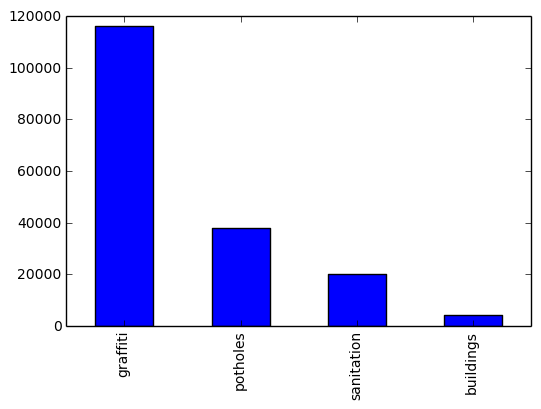

In [499]:
# count by overall category
category = df['file'].value_counts()
category.plot('bar')
category

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


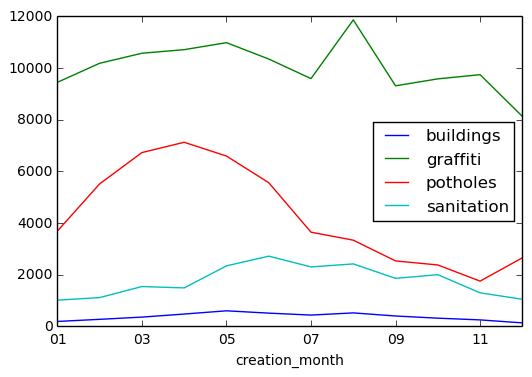

In [156]:
# count by category by month
# source: http://stackoverflow.com/questions/29233283/plotting-multiple-lines-with-pandas-dataframe

df['creation_month'] = df['creation_date'].str.extract('(\d\d)')
df['completion_month'] = df['completion_date'].str.extract('(\d\d)')

month_category = df.groupby(['file', 'creation_month']).size()
month_category = month_category.to_frame()
month_category.reset_index(inplace = True)
month_category.columns = ['file', 'creation_month', 'count']

fig, ax = plt.subplots()
labels = []
for key, group in month_category.groupby(['file']):
    ax = group.plot(ax = ax, kind = 'line', x = 'creation_month', y = 'count')
    labels.append(key)
ax.legend(labels, loc='best')
plt.show()

In [158]:
# counts by graffiti subcateogries
graffiti_subcat = graffiti['where is the graffiti located?'].value_counts()
pd.DataFrame(graffiti_subcat)

,where is the graffiti located?
Front,38212
Side,16898
Pole,11358
Garage,9893
Rear,8337
Traffic Control Box,5407
Alley,5330
Door,4377
Sign,4358
Dumpster,3805


In [17]:
# counts by buildings subcategories
# No approrpiate subcategorizations of buildings 311 data

In [157]:
# counts by potholes subcategories
potholes_subcat = potholes['most recent action'].value_counts()
pd.DataFrame(potholes_subcat)

,most recent action
Pothole Patched,31125
No Potholes Found,3530
Completed Upon Arrival,1479
Street Resurfaced,652
CDOT Pavement Cave-In Survey Transfer Outcome,317
WM Sewer Cave In Inspection Transfer Outcome,264
CDOT Alley Pot Hole Transfer Outcome,214
CDOT Inspect Public Way Survey Transfer Outcome,120
No Action - See Remarks in Description,114
No Such Address Found,43


In [159]:
# sanitation subcategories
sanitation_subcat = sanitation['what is the nature of this code violation?'].value_counts()
pd.DataFrame(sanitation_subcat)

,what is the nature of this code violation?
Other,15138
Garbage in yard,8131
Garbage in alley,4591
Overflowing carts,2810
Dumpster not being emptied,2071
Dog feces in yard,1822
Construction Site Cleanliness/Fence,1272
Standing water,698
Graffiti Commercial Vehicle,47


In [20]:
# count by community area
community_area = df['community_area'].value_counts()
community_area.head(10)

24.0    11126
22.0     9434
58.0     6718
21.0     6042
31.0     5722
6.0      5585
30.0     5523
16.0     5254
63.0     5141
19.0     4895
Name: community_area, dtype: int64

In [137]:
# count by zip (proxy for neighborhood)
zip = df['zip'].value_counts()
zip.head(10)

60632.0    15909
60647.0    11759
60618.0    11576
60608.0    10042
60629.0     9448
60625.0     7780
60622.0     7220
60609.0     6801
60639.0     5606
60623.0     5519
Name: zip, dtype: int64

In [163]:
# response time by category
# source: http://stackoverflow.com/questions/25646200/python-convert-timedelta-to-int-in-a-dataframe

import numpy as np
df['completion_date'] = pd.to_datetime(df['completion_date'], format='%m/%d/%Y')
df['creation_date'] = pd.to_datetime(df['creation_date'], format='%m/%d/%Y')
df['response_time'] = df['completion_date'] - df['creation_date']
df['response_time'] = (df['response_time'] / np.timedelta64(1, 'D')).astype(float)
response_time = df['response_time'].groupby(df['file']).mean()
pd.DataFrame(response_time)

,response_time
file,
buildings,NaN
graffiti,0.613684
potholes,24.346604
sanitation,9.376191


# Problem 1.3: Interesting Observations

1. The highest number of service requests occur during the spring and summer months.

2. Graffiti instances peaked in August 2016. What could have caused that?

3. Almost 10% of potholes reported were either not to be found or completed upon arrival. This suggests potential inefficiencies in the reporting/review process.

4. Graffiti completion times are surprisingly high; 0.6 days on average.

5. Potholes take almost a month to fix; 24 days on average.

# Problem 2: Data Augmentation and APIs
Only doing this analysis on the buildings and sanitation datasets for last 6 months of 2016 due to API rate limitations for ACS data.

Data source: [Census data API](https://www.census.gov/data/developers/data-sets/acs-5year.html)  
Using [summary level 150](http://api.census.gov/data/2011/acs5/geo.html): state-county-tract-block group  

Used [FCC's API](https://www.broadbandmap.gov/developer/api/census-api-by-coordinates) to match FIPS code to lat + lon of 311 request, to allow merging with ACS data.


In [234]:
# get fips code for each buildings report
# Note: this cell takes a while to run due to api requests
import requests

fips_codes = []
for i, row in buildings.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    url = 'https://www.broadbandmap.gov/broadbandmap/census/block?latitude={}&longitude={}&format=json'.format(lat, lon)
    r = requests.get(url)
    if r:
        fips = dict(r.json())
        code = fips['Results']['block'][0]['FIPS']
        fips_codes.append(code)
    else:
        fips_codes.append(None)
buildings['fips_codes'] = fips_codes
buildings[:10]

,service request type,date service request was received,"location of building on the lot (if garage, change type code to bgd).",is the building dangerous or hazardous?,is building open or boarded?,"if the building is open, where is the entry point?",is the building currently vacant or occupied?,is the building vacant due to fire?,"any people using property? (homeless, childen, gangs)",address street number,...,x coordinate,y coordinate,ward,police district,community area,latitude,longitude,location,full address,fips_codes
SERVICE REQUEST NUMBER,,,,,,,,,,,,,,,,,,,,,
16-00017936,Vacant/Abandoned Building,2016-01-02,Front,NaN,Open,FRONT-SIDE AND REAR,Vacant,False,True,5930,...,1.170327e+06,1.865488e+06,16.0,7.0,68.0,41.786386,-87.651033,"(41.78638640364335, -87.65103294840148)",5930SCARPENTERST,170316806001002
16-00027497,Vacant/Abandoned Building,2016-01-03,Front,NaN,Open,NaN,Vacant,False,False,3559,...,1.153522e+06,1.862608e+06,23.0,8.0,66.0,41.778832,-87.712726,"(41.778832091928, -87.7127256067861)",3559W63RDST,170316604003014
16-00035418,Vacant/Abandoned Building,2016-01-03,Front,NaN,Open,"CALLER DOESN'T KNOW THE EXACT ADDRESS, CALLER ...",Vacant,False,False,5900,...,1.167017e+06,1.865600e+06,16.0,7.0,67.0,41.786764,-87.663167,"(41.786764299374006, -87.66316688619024)",5900SJUSTINEST,170316702001038
16-00031311,Vacant/Abandoned Building,2016-01-03,Front,NaN,Open,FRONT ENTRY,Vacant,False,False,8356,...,1.173188e+06,1.849430e+06,21.0,6.0,71.0,41.742258,-87.641018,"(41.74225776568885, -87.64101798247111)",8356SKERFOOTAVE,170317109002012
16-00035051,Vacant/Abandoned Building,2016-01-03,Rear,NaN,Open,REAR,Vacant,False,False,8112,...,1.170063e+06,1.851007e+06,21.0,6.0,71.0,41.746654,-87.652421,"(41.74665406968148, -87.65242142853317)",8112SMAYST,170317108006008
16-00056596,Vacant/Abandoned Building,2016-01-04,Front,NaN,Open,NaN,Vacant,False,False,402,...,1.179990e+06,1.864655e+06,20.0,3.0,42.0,41.783886,-87.615632,"(41.78388564277491, -87.61563244911125)",402E61STST,170314206001012
16-00054380,Vacant/Abandoned Building,2016-01-04,Front,NaN,Open,NaN,Vacant,False,True,12435,...,1.173579e+06,1.822404e+06,34.0,5.0,53.0,41.668086,-87.640383,"(41.66808588888048, -87.64038251498134)",12435SEMERALDAVE,170315305032033
16-00062202,Vacant/Abandoned Building,2016-01-04,Front,NaN,Open,FRONT DOOR OPEN,Vacant,False,False,1626,...,1.133057e+06,1.910124e+06,29.0,25.0,25.0,41.909606,-87.786648,"(41.9096055811526, -87.78664751486437)",1626NNAGLEAVE,170312505002028
16-00052007,Vacant/Abandoned Building,2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11742,...,1.176719e+06,1.827073e+06,34.0,5.0,53.0,41.680829,-87.628750,"(41.6808288273904, -87.62875014237845)",11742SYALEAVE,170315302005051


In [26]:
# get fips code for each sanitation complaint
# Note: this cell takes a while to run due to api requests

fips_codes = []
for i, row in sanitation.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    url = 'https://www.broadbandmap.gov/broadbandmap/census/block?latitude={}&longitude={}&format=json'.format(lat, lon)
    r = requests.get(url)
    if r:
        fips = dict(r.json())
        code = fips['Results']['block'][0]['FIPS']
        fips_codes.append(code)
    else:
        fips_codes.append(None)
sanitation['fips_codes'] = fips_codes
sanitation[:10]

,creation date,status,completion date,type of service request,what is the nature of this code violation?,street address,zip code,x coordinate,y coordinate,ward,police district,community area,latitude,longitude,location,fips_codes
Service Request Number,,,,,,,,,,,,,,,,
16-00005911,01/01/2016,Completed,01/04/2016,Sanitation Code Violation,Dumpster not being emptied,18 N TALMAN AVE,60612.0,1.158853e+06,1.899917e+06,27,12,27,41.881106,-87.692162,"(41.88110597862378, -87.69216226978267)",170318374002000
16-00008105,01/01/2016,Completed,01/04/2016,Sanitation Code Violation,Garbage in yard,7938 S WABASH AVE,60619.0,1.178087e+06,1.852392e+06,6,6,44,41.750278,-87.622979,"(41.750278002798325, -87.62297857190532)",170314403005001
16-00008183,01/01/2016,Completed,01/04/2016,Sanitation Code Violation,Construction Site Cleanliness/Fence,442 W WACKER DR ER,60607.0,1.174083e+06,1.898170e+06,25,1,32,41.875985,-87.636291,"(41.87598480231486, -87.6362905484112)",170318391002037
16-00009911,01/01/2016,Completed,01/04/2016,Sanitation Code Violation,Dumpster not being emptied,2712 W ARTHUR AVE,60645.0,1.157018e+06,1.943020e+06,50,24,2,41.999420,-87.697727,"(41.999419638611165, -87.69772708238521)",170310206013000
16-00011795,01/01/2016,Completed,01/04/2016,Sanitation Code Violation,Dumpster not being emptied,3030 N HONORE ST,60657.0,1.163584e+06,1.920281e+06,32,19,5,41.936888,-87.674216,"(41.93688765836184, -87.67421593086208)",170310513001017
16-00005916,01/01/2016,Completed,01/05/2016,Sanitation Code Violation,Other,5258 S WHIPPLE ST,60632.0,1.156936e+06,1.869613e+06,14,9,63,41.797987,-87.700022,"(41.797987190613256, -87.70002151020466)",170316304004014
16-00008826,01/01/2016,Completed,01/05/2016,Sanitation Code Violation,Other,377 N NB OUTER LAKE SHORE DR,60601.0,1.180120e+06,1.902848e+06,42,18,8,41.888685,-87.613981,"(41.88868520186334, -87.61398112884407)",170310814031005
16-00005194,01/01/2016,Completed,01/06/2016,Sanitation Code Violation,Overflowing carts,12000 S PRINCETON AVE,60628.0,1.176442e+06,1.825356e+06,34,5,53,41.676124,-87.629816,"(41.67612352544859, -87.62981637199104)",170315305011031
16-00007120,01/01/2016,Completed,01/11/2016,Sanitation Code Violation,Dog feces in yard,8612 S KOSTNER AVE,60652.0,1.148594e+06,1.847073e+06,18,8,70,41.736297,-87.731193,"(41.73629660780156, -87.73119328676863)",170317003022016


In [259]:
# break down fips code into components
# Reducing down to last 6 months of 2016 only

buildings['date service request was received'] = pd.to_datetime(buildings['date service request was received'], format='%m/%d/%Y')
sanitation['creation date'] = pd.to_datetime(sanitation['creation date'], format='%m/%d/%Y')

buildings_recent = buildings[buildings['date service request was received'] > '07/01/2016']
sanitation_recent = sanitation[sanitation['creation date'] > '07/01/2016']
all_fips = np.concatenate((buildings_recent['fips_codes'].unique(), sanitation_recent['fips_codes'].unique()),axis = 0)
all_fips = all_fips[all_fips != np.array(None)]

np.split(all_fips, [2, 5, 11, 12])
state = [i[:2] for i in all_fips]
county = [i[2:5] for i in all_fips]
tract = [i[5:11] for i in all_fips]
block_group = [i[11:12] for i in all_fips]
block = [i[12:15] for i in all_fips]

fips_sep = pd.DataFrame({'full':all_fips, 'state':state, 'county':county, 'tract':tract, 'block_group': block_group, 'block': block})
fips_sep[:10]

,block,block_group,county,full,state,tract
0,004,2,031,170316701002004,17,670100
1,013,1,031,170316706001013,17,670600
2,011,1,031,170316604001011,17,660400
3,012,2,031,170311910002012,17,191000
4,011,2,031,170316910002011,17,691000
5,008,1,031,170316909001008,17,690900
6,012,2,031,170316720002012,17,672000
7,010,4,031,170316814004010,17,681400
8,035,3,031,170315305033035,17,530503
9,006,1,031,170312312001006,17,231200


In [148]:
# Call ACS api and create an output dataframe.
# Note: This cell takes a long time to run due to API requests.

output = []
for i, row in fips_sep.iterrows():
    p = 'B01003_001E,' # total population
    r1 = 'B02001_001E,' # race total
    r2 = 'B02001_002E,' # white 
    r3 = 'B02001_003E,' # black or African American 
    r4 = 'B02001_004E,' # American Indian and Alaska Native
    r5 = 'B02001_005E,' # Asian
    r6 = 'B02001_006E,' # Native Hawaiian or other Pacific Islander
    r7 = 'B02001_004E,' # Other race
    i = 'B19101_001E,' # Family Income in the Past 12 Months (in 2015 Inflation-Adjusted Dollars), total
    h = 'B25010_001E' # average household size, total
    
    url = 'http://api.census.gov/data/2015/acs5?get='+p+r1+r2+r3+r4+r5+r6+r7+i+h+'&for=block+group:{}&in=state:{}+county:{}+tract:{}&key=086d412671b3975c5fbfb74009c8700647de7745'
    url = url.format(row['block_group'], row['state'], row['county'], row['tract'])
    r = requests.get(url)
    
    if r:
        ls = r.json()[1] + [row['full']]
        output.append(ls)
    else:
        output.append([None]*14)

output_df = pd.DataFrame(output, columns = ['pop', 'race_tot', 'white', 'black', 'AI', 'Asian', 'PI', 'other', 'income', 'hh_size', 'state', 'county', 'tract', 'block_group', 'full'])
output_df[:10]

,pop,race_tot,white,black,AI,Asian,PI,other,income,hh_size,state,county,tract,block_group,full
0,817,817,47,725,0,0,0,0,179,3.87,17,031,670100,2,170316701002004
1,769,769,27,655,0,0,0,0,126,2.97,17,031,670600,1,170316706001013
2,1753,1753,544,60,0,0,0,0,345,4.44,17,031,660400,1,170316604001011
3,1652,1652,800,93,0,0,0,0,385,3.91,17,031,191000,2,170311910002012
4,700,700,0,700,0,0,0,0,115,2.46,17,031,691000,2,170316910002011
5,576,576,0,576,0,0,0,0,117,2.68,17,031,690900,1,170316909001008
6,632,632,8,615,0,0,0,0,175,2.93,17,031,672000,2,170316720002012
7,441,441,0,441,0,0,0,0,68,1.93,17,031,681400,4,170316814004010
8,2242,2242,0,2242,0,0,0,0,409,3.18,17,031,530503,3,170315305033035
9,1242,1242,129,298,0,0,0,0,279,3.35,17,031,231200,1,170312312001006


In [366]:
# make copies of dfs to avoid mistakes that require recalling API
output_df_cp = output_df.copy(deep=True)
buildings_cp = buildings_recent.copy(deep=True)
sanitation_cp = sanitation_recent.copy(deep=True)

In [278]:
output_df_cp.columns

Index(['pop', 'race_tot', 'white', 'black', 'AI', 'Asian', 'PI', 'other',
       'income', 'hh_size', 'state', 'county', 'tract', 'block_group',
       'fips_codes', 'pct_white', 'pct_black', 'pct_AI', 'pct_Asian', 'pct_PI',
       'pct_other'],
      dtype='object')

In [281]:
buildings_cp.columns

Index(['service request type', 'date service request was received',
       'location of building on the lot (if garage, change type code to bgd).',
       'is the building dangerous or hazardous?',
       'is building open or boarded?',
       'if the building is open, where is the entry point?',
       'is the building currently vacant or occupied?',
       'is the building vacant due to fire?',
       'any people using property? (homeless, childen, gangs)',
       'address street number', 'address street direction',
       'address street name', 'address street suffix', 'zip code',
       'x coordinate', 'y coordinate', 'ward', 'police district',
       'community area', 'latitude', 'longitude', 'location', 'full address',
       'fips_codes'],
      dtype='object')

In [387]:
# calculate percentage columns, convert data types

for col in ['white', 'black', 'AI', 'Asian', 'PI', 'other', 'pop', 'fips_codes']:
    output_df_cp[col].astype(str).astype(int)

for i in ['white', 'black', 'AI', 'Asian', 'PI', 'other']:
    title = 'pct_' + i
    output_df_cp[title] = output_df_cp[i] / output_df_cp['pop']

buildings_cp['fips_codes'] = buildings_cp['fips_codes'].astype(str).astype(int)
sanitation_cp['fips_codes'] = sanitation_cp['fips_codes'].astype(str).astype(int)
    

In [441]:
# merge ACS data with buildings and sanitation dataframes

output_df_cp.rename(columns={'full':'fips_codes'}, inplace=True)
output_df_cp['tract_level'] = output_df_cp['state'] + output_df_cp['county'] + output_df_cp['tract'] 

buildings_joined = pd.merge(buildings_cp, output_df_cp, on='fips_codes')
sanitation_joined = pd.merge(sanitation_cp, output_df_cp, on='fips_codes')

In [448]:
# Buildings descriptive statistics at tract level - by race

for i in ['pop', 'race_tot', 'white', 'black', 'AI', 'Asian', 'PI',
       'other', 'income', 'hh_size','pct_white', 'pct_black', 'pct_AI', 'pct_Asian',
       'pct_PI', 'pct_other']:
    buildings_joined[i] = buildings_joined[i].astype('float')

tract = buildings_joined['tract_level'].value_counts()
tract = tract.to_frame()
tract.reset_index(level=0, inplace=True)
tract.columns=['tract_level', 'count']

build_agg = buildings_joined[['tract_level', 'pct_white', 'pct_black', 'pct_Asian', 'income', 'hh_size']].groupby(['tract_level']).mean()
build_agg.reset_index(level=0, inplace=True)

build_tract = pd.merge(build_agg, tract, on='tract_level').sort()
build_tract.sort(columns='count', ascending=False)

# Tracts with high number of buildings reports are predominantly black. Race composition appears to be more variable
# for tracks with lower number of buildings reports.

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:16: FutureWarning: sort(....) is deprecated, use sort_index(.....)
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:17: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,tract_level,pct_white,pct_black,pct_Asian,income,hh_size,count
309,17031681400,0.000000,1.000000,0.000000,162.000000,2.946471,51
155,17031420700,0.023383,0.948007,0.000000,149.159091,2.596591,44
297,17031671500,0.034698,0.896111,0.000000,224.666667,3.155238,42
301,17031672000,0.006812,0.946365,0.000000,192.428571,3.438000,35
170,17031440201,0.018058,0.962043,0.000000,293.062500,2.298125,32
281,17031660900,0.045534,0.819933,0.034044,274.032258,3.098065,31
337,17031711000,0.001433,0.991165,0.000955,249.333333,2.704667,30
305,17031681000,0.016580,0.962434,0.000000,138.800000,2.584000,30
182,17031460500,0.023818,0.956130,0.000000,176.966667,2.188333,30
278,17031660600,0.071920,0.819338,0.001164,210.285714,3.447143,28


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


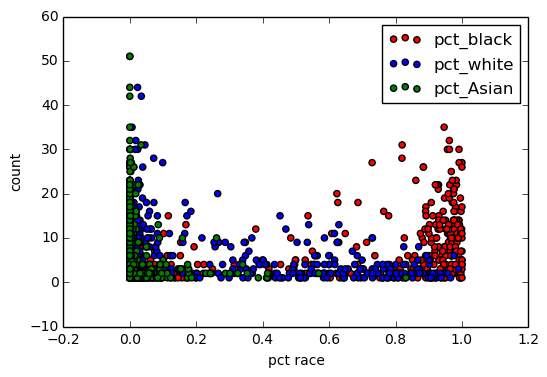

In [461]:
# plot relationship between race and number of buildings reports in a tract
fig, ax = plt.subplots()
labels = []
colors = ['red', 'blue', 'green']
for i, col in enumerate(['pct_black', 'pct_white', 'pct_Asian']):
    ax = build_tract.plot(ax = ax, kind = 'scatter', x = col, y = 'count', c=colors[i])
    labels.append(col)
ax.legend(labels, loc='best')
ax.set_xlabel("pct race")
plt.show()


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


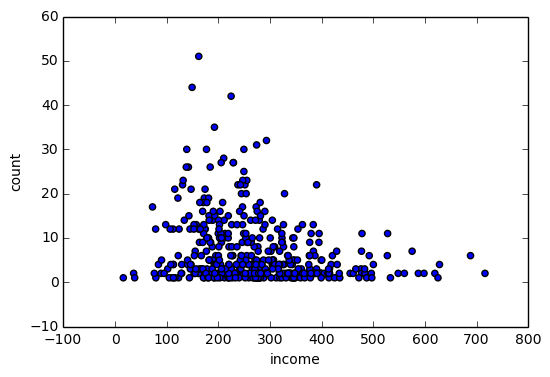

In [449]:
# Buildings descriptive statistics at tract level - by avg income of tract
build_tract.plot(kind='scatter', x='income', y='count')

# Observation: tracts with high counts of buildings reports generally are of lower income

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


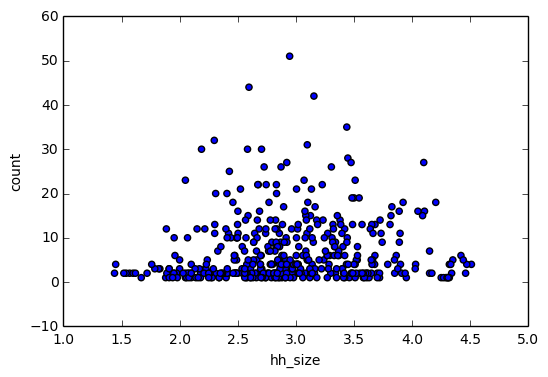

In [450]:
# Buildings descriptive statistics at tract level - by avg hh_size of tract
build_tract.plot(kind='scatter', x='hh_size', y='count')

# Observation: no clear relationship between household size and number of buildings reports

In [443]:
# sanitation descriptive statistics at tract level - by race

for i in ['pop', 'race_tot', 'white', 'black', 'AI', 'Asian', 'PI',
       'other', 'income', 'hh_size','pct_white', 'pct_black', 'pct_AI', 'pct_Asian',
       'pct_PI', 'pct_other']:
    sanitation_joined[i] = sanitation_joined[i].astype('float')

tract = sanitation_joined['tract_level'].value_counts()
tract = tract.to_frame()
tract.reset_index(level=0, inplace=True)
tract.columns=['tract_level', 'count']

sanit_agg = sanitation_joined[['tract_level', 'pct_white', 'pct_black', 'pct_Asian', 'income', 'hh_size']].groupby(['tract_level']).mean()
sanit_agg.reset_index(level=0, inplace=True)

sanit_tract = pd.merge(sanit_agg, tract, on='tract_level').sort()
sanit_tract.sort(columns='count', ascending=False)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:16: FutureWarning: sort(....) is deprecated, use sort_index(.....)
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:17: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,tract_level,pct_white,pct_black,pct_Asian,income,hh_size,count
44,17031031400,0.723316,0.153388,0.070541,91.440000,1.478053,125
513,17031570300,0.543154,0.000938,0.019146,332.727273,3.708000,110
604,17031681200,0.000000,0.956463,0.000000,152.937500,2.769479,96
191,17031160602,0.703617,0.001151,0.093434,286.056180,2.323820,89
477,17031491300,0.041055,0.921310,0.000000,116.157895,3.183026,76
512,17031570200,0.715989,0.007046,0.031978,412.000000,3.140000,75
424,17031420700,0.030021,0.948461,0.000000,158.080000,2.784933,75
443,17031440201,0.023220,0.951661,0.000000,239.527027,2.268919,74
652,17031730600,0.000000,0.989247,0.000000,308.258065,2.545484,62
497,17031530503,0.012359,0.972932,0.010262,345.483871,2.955161,62


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


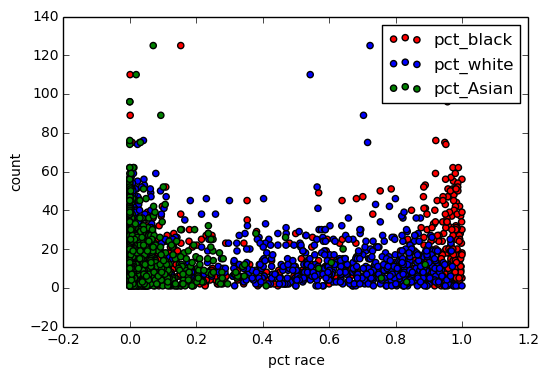

In [462]:
# plot relationship between race and number of sanitation reports in a tract
fig, ax = plt.subplots()
labels = []
colors = ['red', 'blue', 'green']
for i, col in enumerate(['pct_black', 'pct_white', 'pct_Asian']):
    ax = sanit_tract.plot(ax = ax, kind = 'scatter', x = col, y = 'count', c=colors[i])
    labels.append(col)
ax.legend(labels, loc='best')
ax.set_xlabel("pct race")
plt.show()

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


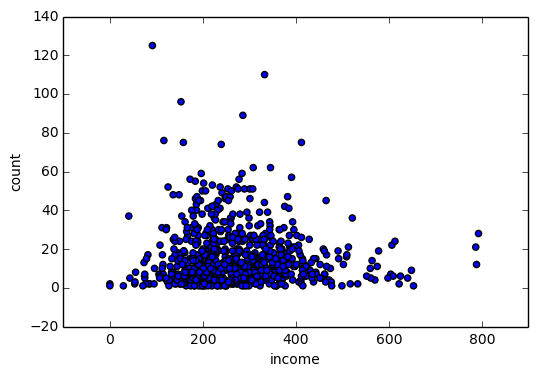

In [463]:
# sanitation descriptive statistics at tract level - by avg income of tract
sanit_tract.plot(kind='scatter', x='income', y='count')

# Observation: lower income tracts seem to have higher counts of sanitation reports, but the relationship is unclear

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


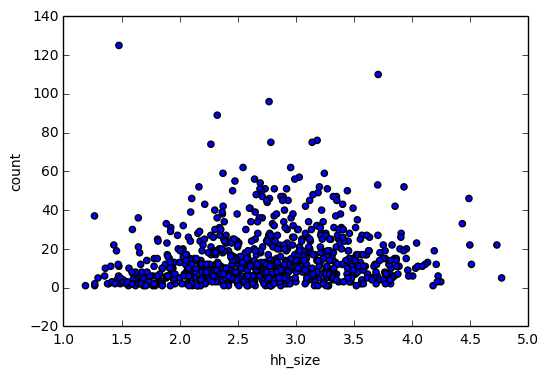

In [464]:
# Buildings descriptive statistics at tract level - by avg hh_size of tract
sanit_tract.plot(kind='scatter', x='hh_size', y='count')

# Observation: no clear relationship between household size and number of sanitation reports

# Problem 3

Tract level for 7500 S Wolcott Ave: 17031710400  
Source: http://www.geolytics.com/USCensus,Geocode,Data,Geography,Products.asp



Part a: Graffiti reuqests are most likely because they make up such a huge proportion of the four types of requests. The probabilities of each type are approximately:
Total requests (duplicates removed): 178,831 
graffiti      120461 (66%)
potholes       51507 (29%)
sanitation     21139 (12%)
buildings       4472 (3%)

Part b: It is more likely to have come from Lawndale because that census tract has a higher proportion of graffiti calls.

Part c: 10% of all calls are about Englewood graffiti, and 16% of all calls are about Uptown graffiti. If we know that a call is about graffiti, then it is 1.6 times as likely to be from Uptown as it is to be from Englewood.